<a href="https://colab.research.google.com/github/ammarb28/Arduino-GPS/blob/main/Assignment%209%20-%20More%20ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ammar Bhayat
<br>
Due date: Mar. 18, 2025, 11:59pm
<br>
PHYS 2030 W25


# <center><font color=#46769B>Homework assignment 9</font></center>

__Rubric (100 points total)__:

- Problem 1a - __40 points__

- Problem 1b - __0 points__

- Problem 2a - __15 points__

- Problem 2b - __15 points__

- Problem 3a - __15 points__

- Problem 3b - __15 points__

</font>

## <font color=#46769B>Introduction: More ODEs</font>

Our goals for this notebook are:

- Gain further experience with Runge-Kutta and leapfrog methods.

Required reading:
- *Lesson 8: Higher-order methods*

- *Lesson 9: Leapfrog method*

## <font color=#46769B>Problem 1: N-body simulations</font>

### <font color=#46769B>Introduction</font>

Consider a general gravitational $N$-body problem using the leapfrog algorithm described in the lecture notes. That is, we have $n$ masses, each with their own position and velocity vectors:

$$\mathbf{r}_i(t) = (x_i(t), y_i(t), z_i(t) ) \, , \quad \mathbf{v}_a(t) = (v_{xi}(t), v_{yi}(t), v_{zi}(t) ) \, ,$$

where $i = 1, 2, ..., n$ labels the mass. (We use $n$ to indicate the number of masses, so you don't get confused with $N$ the number of timesteps.) Each mass exerts a gravitational force on all of the other masses, so the acceleration on mass $i$ is

$$\mathbf{a}_i  = \sum_{j=1\\i\ne j}^n \frac{G m_j \mathbf{r}_{ji}}{|\mathbf{r}_{ji}|^3}  \, .$$

In the previous exercises, you (probably) coded up your acceleration function using a "brute force" approach in which each term was coded up separately. This is not feasible once $n$ becomes large, so will we use a different approach here.

Before we outline the method, we will modify Newton's law of gravitation as follows:

$$\mathbf{a}_i  = \sum_{j=1}^n \frac{G m_j \mathbf{r}_{ji}}{(|\mathbf{r}_{ji}|^2 + \epsilon^2 )^{3/2}}  \, . \qquad (1)$$

The parameter $\epsilon$ is known as the __softening length__ and is introduced for practical purposes. The idea is that for fixed $h$, close flyby encounters between two masses can have a large error in their dynamics. Gravitational softening is a way of mitigating this effect. (The curious reader can learn more [here](https://astronomy.stackexchange.com/questions/50106/what-is-gravitational-softening-length)). Newtonian gravity is reproduced in the limit $\epsilon \to 0$, but a very small step $h$ is needed to reach this limit.

Here, we will use Eq. (1) for our acceleration and set $\epsilon = 0.5$. Note that we don't need to restrict the sum with $i \ne j$ anymore since the $i=j$ term vanishes since $\mathbf{r}_{ii} = \mathbf{r}_i - \mathbf{r}_i = 0$ in the numerator.

Next, it is helpful to organize the positions and velocities in a different way that we did previously. Instead of defining long vector $\mathbf{r}$ and $\mathbf{v}$, each of length $3n$, we will define these quantities as *matrices* of size $n \times 3$:

$$\mathbf{r}(t) = \left(\begin{array}{ccc} x_1(t) &  y_1(t) &  z_1(t) \\ x_2(t) &  y_2(t) &  z_2(t) \\ & \vdots & \\
x_n(t) &  y_n(t) &  z_n(t) \end{array} \right) \, , \qquad
\mathbf{v}(t) = \left(\begin{array}{ccc} v_{x1}(t) &  v_{y1}(t) &  v_{z1}(t) \\ v_{x2}(t) &  v_{y2}(t) &  v_{z2}(t) \\ & \vdots & \\
v_{xn}(t) &  v_{yn}(t) &  v_{zn}(t) \end{array} \right) \, .$$

When we initialize our arrays to save our numerical solutions, we need to initialize them with a different dimension:

```py
r = np.zeros((num_steps+1,n,3))
v = np.zeros((num_steps+1,n,3))
```

Now, our `r` carries *three* indices, e.g., `r[i,j,k]` takes the `i`th timestep, `j`th mass $m_j$, and the `k`th component of $(x,y,z)$.

Next, consider how to code up the acceleration function. Your code will look like this:

```py
def accel(t,r):

    a = np.zeros((n,3))

    for i in range(n):
        for j in range(n):
        
            ri = r[i]
            rj = r[j]
            
            # Calculate acceleration and add appropriately to a

    return a
```

So, we have nested `for` loops that calculate the acceleration on mass `i` due to `j` for all combinations of `i` and `j`. Note that the `r` variable here is a $(n \times 3)$-dimensional array. The advantage of our structuring `r` like this is that we can easily get the `i`th mass's $\mathbf{r}_i(t)$ by simple indexing `r[i]`.

With these modifications, all the usual parts of the leapfrog algorithm as the same as before.

### <font color=#46769B>Part (a):</font>

Write a code for the dynamics of $n=10$ bodies, subject to the softened gravitational force in Eq. (1). For simplicity, set $m=1$ for all masses. Also take units such that Newton's constant $G = 1$.

Take the following initial conditions for `r0` and `v0`:

- Each is a $(n \times 3)$ matrix, where each element is randomly sampled from a normal distribution centered at $0$ and with width $\sigma_r = 1$ for `r0` and $\sigma_v = 0.5$ for `v0`.

- Calculate the mean 3D velocity of the masses at $t=0$ (the center-of-mass velocity):
$$v_{\rm CM} = \frac{1}{n} \sum_{i=1}^n \mathbf{v}_{i}(0)$$
and subtract this from `v0` to remove the center-of-mass motion from your initial condition.

With this initial condition, your task is to code up the leapfrog method for this system for $N=10^4$ time steps, spanning a time interval $[0,100]$. Assign your numerical results $\mathbf{r}(t)$ and $\mathbf{v}(t)$ to variables `r` and `v`, respectively, each of which should be $(N+1) \times 10 \times 3$-dimensional arrays.

Make a parametric plot of the trajectories of all particles in the $x$-$y$ plane. That is, do this
```py
plt.plot(x,y)
```
where `x` and `y` are the list of $x_i(t), y_i(t)$ values for all time steps for mass $i$. Plot all masses on the same plot, and make your figure a square shape with the same range on both $x$ and $y$ axes.


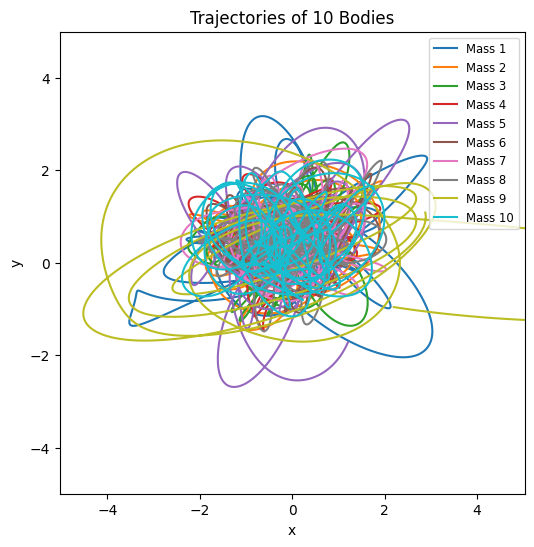

Initial center-of-mass position: [0.05780679 0.40997928 0.87191213]
Final center-of-mass position: [0.05780679 0.40997928 0.87191213]
Initial center-of-mass velocity: [ 2.22044605e-17 -2.77555756e-17  2.77555756e-17]
Final center-of-mass velocity: [ 2.54796184e-15 -1.50990331e-15  3.55548924e-15]


In [1]:
### Code for part (a) here (keep this comment here) ###
### Code for part (a) here (keep this comment here) ###
### Code for part (a) here (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt

G = 1.0          # gravitational constant simple units
epsilon = 0.5    # softening length
n = 10         # bodies
N = 10000        # number of timesteps
t_max = 100.0    # [0, 100]
h = t_max / N    # timestep size

# Masses set to 1
m = np.ones(n)

# Initial conditions
sigma_r = 1.0
sigma_v = 0.5
r0 = np.random.normal(loc=0.0, scale=sigma_r, size=(n, 3))
v0 = np.random.normal(loc=0.0, scale=sigma_v, size=(n, 3))

# Correct initial velocity for zero center-of-mass velocity
v_CM = (1/n) * np.sum(v0, axis=0)
v0 = v0 - v_CM

r = np.zeros((N + 1, n, 3))
v = np.zeros((N + 1, n, 3))
r[0] = r0
v[0] = v0

# Acceleration function
def accel(t, r):
    a = np.zeros((n, 3))
    for i in range(n):
        for j in range(n):
            if i != j:  # Skip self-interaction
                ri = r[i]
                rj = r[j]
                r_ji = rj - ri
                r_ji_sq = np.sum(r_ji**2)
                denom = (r_ji_sq + epsilon**2)**1.5
                if denom > 0:
                    a[i] += G * m[j] * r_ji / denom
    return a

# Leapfrog integration
a = accel(0, r[0])
v_half = v[0] + 0.5 * h * a

# Time evolution
for t in range(N):
    r[t + 1] = r[t] + h * v_half
    a_new = accel(t + 1, r[t + 1])
    v[t + 1] = v_half + 0.5 * h * a_new
    v_half = v[t + 1] + 0.5 * h * a_new

# Compute center-of-mass position and velocity over time
r_CM = np.mean(r, axis=1)  # Shape: (N+1, 3)
v_CM = np.mean(v, axis=1)  # Shape: (N+1, 3)

plt.figure(figsize=(6, 6))
for i in range(n):
    x = r[:, i, 0]
    y = r[:, i, 1]
    plt.plot(x, y, label=f'Mass {i+1}')
plt.axis('equal')
range_limit = 5.0
plt.xlim(-range_limit, range_limit)
plt.ylim(-range_limit, range_limit)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of 10 Bodies')
plt.legend(loc='upper right', fontsize='small')
plt.show()



print(f"Initial center-of-mass position: {r_CM[0]}")
print(f"Final center-of-mass position: {r_CM[-1]}")
print(f"Initial center-of-mass velocity: {v_CM[0]}")
print(f"Final center-of-mass velocity: {v_CM[-1]}")

### <font color=#46769B>Part (b):</font>

Next, we will use a package called `celluloid` to make an animation of your $n$-body simulation. The basic idea of `celluloid` is that you make a series of plots, take a snapshot of each one, and then each snapshot becomes a frame in an animation.

If you are running your code in Colab, you need to uncomment the second line `!pip install celluloid`.

Your task is to take your results from Part (a) and run the following code to make an animation. Feel free to modify anything here as you like, but you don't need to change anything here. This is just for your own benefit: it is nice to see an animation of your $N$-body simulation.

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


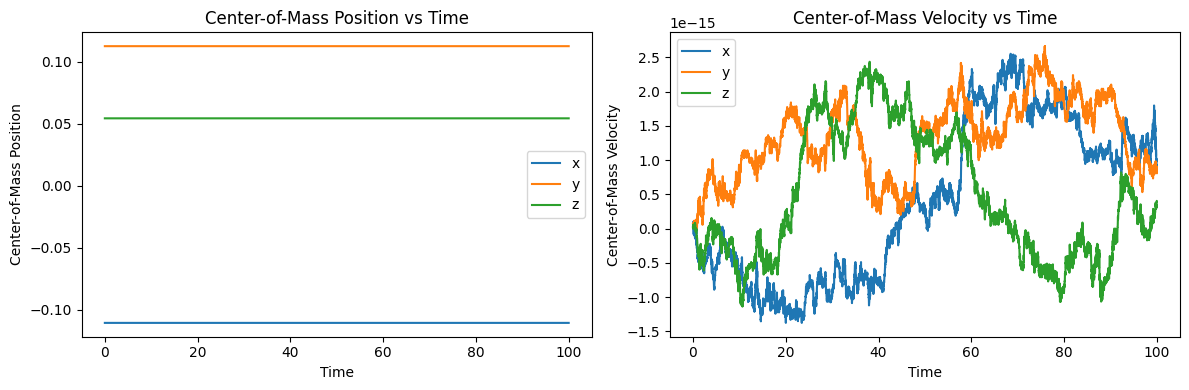

Initial center-of-mass position: [-0.11074494  0.11276785  0.05447951]
Final center-of-mass position: [-0.11074494  0.11276785  0.05447951]
Initial center-of-mass velocity: [1.94289029e-17 6.93889390e-17 3.33066907e-17]
Final center-of-mass velocity: [8.88178420e-16 8.10462808e-16 3.99680289e-16]


In [60]:
### Code for part (a) here (keep this comment here) ###
### Code for part (a) here (keep this comment here) ###
### Code for part (a) here (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt


G = 1.0
epsilon = 0.5
n = 10           #bodies
N = 10000        #timesteps
t_max = 100.0    #[0, 100]
h = t_max / N

m = np.ones(n)

sigma_r = 1.0
sigma_v = 0.5


r0 = np.random.normal(loc=0.0, scale=sigma_r, size=(n, 3))
v0 = np.random.normal(loc=0.0, scale=sigma_v, size=(n, 3))

v_CM = (1/n) * np.sum(v0, axis=0)
v0 = v0 - v_CM


r = np.zeros((N + 1, n, 3))
v = np.zeros((N + 1, n, 3))





r[0] = r0
v[0] = v0

def accel(t, r):
    a = np.zeros((n, 3))
    for i in range(n):
        for j in range(n):
            if i != j:
                ri = r[i]  #mass i
                rj = r[j]  #mass j
                r_ji = rj - ri
                r_ji_sq = np.sum(r_ji**2)
                denom = (r_ji_sq + epsilon**2)**1.5
                if denom > 0:
                    a[i] += G * m[j] * r_ji / denom
    return a

#Leapfrog integration
a = accel(0, r[0])
v_half = v[0] + 0.5 * h * a

#Time evolution
for t in range(N):
    r[t + 1] = r[t] + h * v_half
    a_new = accel(t + 1, r[t + 1])
    v[t + 1] = v_half + 0.5 * h * a_new
    v_half = v[t + 1] + 0.5 * h * a_new

r_CM = np.mean(r, axis=1)
v_CM = np.mean(v, axis=1)

### Code for part (b) here (keep this comment here) ###
# Uncomment this next line in Google Colab to install celluloid
!pip install celluloid

try:
    from celluloid import Camera
    from IPython.display import HTML

    # Animation setup
    fig = plt.figure(figsize=(8, 8))
    camera = Camera(fig)
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])

    num_steps = len(r) - 1  # Adjusted to use r array length directly
    skip = 50  # Only includes every 50th time step

    for i in range(10, num_steps, skip):
        for j in range(n):
            plt.plot(r[i-10:i, j, 0], r[i-10:i, j, 1], '.', label=f'Mass {j+1}' if i == 10 and j == 0 else None)
        camera.snap()

    animation = camera.animate(interval=20)
    plt.close()

    # Display animation in notebook
    from IPython.display import display
    display(HTML(animation.to_html5_video()))

except ImportError:
    print("error with celliod")
    plt.figure(figsize=(8, 8))
    for j in range(n):
        plt.plot(r[:, j, 0], r[:, j, 1], label=f'Mass {j+1}')
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Static Trajectories (Animation Failed)')
    plt.legend()
    plt.show()

#Plot CM vals
time = np.linspace(0, t_max, N + 1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(time, r_CM[:, 0], label='x')
plt.plot(time, r_CM[:, 1], label='y')
plt.plot(time, r_CM[:, 2], label='z')
plt.xlabel('Time')
plt.ylabel('Center-of-Mass Position')
plt.title('Center-of-Mass Position vs Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, v_CM[:, 0], label='x')
plt.plot(time, v_CM[:, 1], label='y')
plt.plot(time, v_CM[:, 2], label='z')
plt.xlabel('Time')
plt.ylabel('Center-of-Mass Velocity')
plt.title('Center-of-Mass Velocity vs Time')
plt.legend()
plt.tight_layout()
plt.show()

#initial and final CM values
print(f"Initial center-of-mass position: {r_CM[0]}")
print(f"Final center-of-mass position: {r_CM[-1]}")
print(f"Initial center-of-mass velocity: {v_CM[0]}")
print(f"Final center-of-mass velocity: {v_CM[-1]}")

## <font color=#46769B>Problem 2: Chaos</font>

### <font color=#46769B>Introduction</font>

Here we consider a __driven damped pendulum__, given by the equation of motion

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin(\theta(t)) = A \omega^2 \cos(\nu t) \, . \qquad (1)$$

The term on the right-hand side represents an external driving force that exerts a periodic torque to the pendulum arm, with (angular) frequency $\nu$ and amplitude $A$. (Note the form of the driving force here is different than for Kapitza's pendulum, for which the pivot was forced to move up and down.)

This system is one of the simplest dynamical systems that exhibits __chaotic motion__. How is chaos defined mathematically in this context? One necessarily condition is *sensitivity to initial conditions*, also known as the __butterfly effect__. Two trajectories, with very slightly different initial conditions, will diverge exponentially from one another and will have very different positions and velocities at some later time.

Suppose we have solved Eq. (1) *twice*, each for a different initial condition. For example, suppose solution 1 is labeled $\theta_1(t)$ and has initial condition

$$\theta_1(0) = \theta_0 , \quad \theta'_1(0) = 0$$

and solution 2 is labeled $\theta_2(t)$ and has initial condition

$$\theta_2(0) = \theta_0 + \epsilon , \quad \theta'_2(0) = 0$$

where $\epsilon$ is a very small number. The difference

$$\Delta \theta(t) = |\theta_1(t) - \theta_2(t)| \, \qquad (2) $$

as a function of time can be approximately parametrized as

$$\Delta \theta(t) \approx  \epsilon \, e^{\lambda t} \, . \qquad (3) $$

The exponent $\lambda$ is known as a __Lyapunov exponent__.
- $\lambda > 0$ indicates chaotic motion, where tiny differences grow exponentially in time.
- $\lambda < 0$ indicates non-chaotic damped motion, where slightly different solutions converge to a common periodic trajectory.

(This is a bit of a simplification. Since we can also quantify the divergence in the *angular velocity* difference $|\theta'_1(t) - \theta'_2(t)|$, there are in fact two Lyapunov exponents for this setup. Here we keep it simple and only consider $\lambda$ as defined above. Further reading can be found [here](https://hypertextbook.com/chaos/lyapunov-1/) and [here](https://en.wikipedia.org/wiki/Lyapunov_exponent).)

Here we will consider the following parameters

$$\omega = 1.5 , \quad \gamma = 0.75 , \quad \nu = 1$$

and we will consider several values of $A$.

There is wonderful reference [here](http://galileoandeinstein.phys.virginia.edu/7010/CM_22a_Period_Doubling_Chaos.html) that covers this system in detail. I recommend taking a look there before you begin this exercise. The parameters chosen here match those adopted in this reference, although the notation is a bit different.


### <font color=#46769B>Part (a)</font>

First, write a function `RK4_method(theta0,num,A)` using a `def` statement that can perform the RK4 method for the system in Eq. (1), for $t$ in the range $[0,100]$, with `num` steps. Here the arguments are the initial condition $\theta_0 = \theta(0)$, and the amplitude $A$ for the driving term.

Using your code, perform the following tasks:

- Taking $\theta_0 = 0$, `num = 10**5` steps, and $A=1.0$, solve for $\theta(t)$ and $\theta'(t)$. Assign your results to the variables `theta` and `theta_prime`.

- Make plot of $\theta(t)$ vs $t$. This case is *non-chaotic* motion. You will notice a few oscillations of varying height, known as *initial transients*, before your solution settles down into a regular pattern. Note by eye the time when the initial transients have gone.

- Make a phase portrait of $\theta'(t)$ vs $\theta(t)$ from your numerical solution. Make two versions of the plot (either separate or in the same figure):

    - For all values of $t$ in your numerical solution.
    
    - Only for values of $t$ *after* the initial transients have died away.

The latter plot makes clear that you have periodic motion. (But in the first plot it is nice to see how the trajectory is attracted to its periodic trajectory.)

- Plot $\log \Delta \theta(t)$ (where $\log$ is natural log) vs $t$, where $\Delta \theta(t)$ is defined in Eq. (2), taking $\epsilon = 10^{-3}$. That is, your numerical solution `theta` above corresponds to $\theta_1(t)$, and you will have to generate a new numerical solution $\theta_2(t)$ by solving the ODE again with an initial condition $\theta_0 = \epsilon$ (and all other parameters the same). Include axes labels in your plot.

Note in the above plot, the difference $\Delta \theta(t)$ starts decreasing *after* the transients have died away.

- Calculate (and print out) the Lyapunov exponent $\lambda$. To do this, you are fitting a straight line to your plot of $\log \Delta \theta(t)$ vs $t$, *only in the region after the transients*. Feel free to be creative here, but it may be useful to use the function `numpy.polyfit(x,y,deg)`, where the `x` values are your values for $t$, the `y` values for $\Delta \theta)$, and `deg=1` fits a polynomial of degree 1. The slope is $\lambda$. Assign your result for $\lambda$ to a variable `lambda_nonchaotic`.

- Plot your straight line fit with slope $\lambda$ on your plot above.

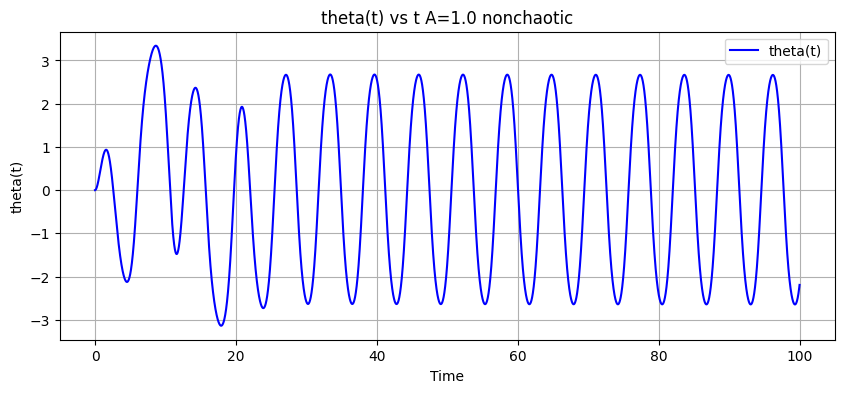

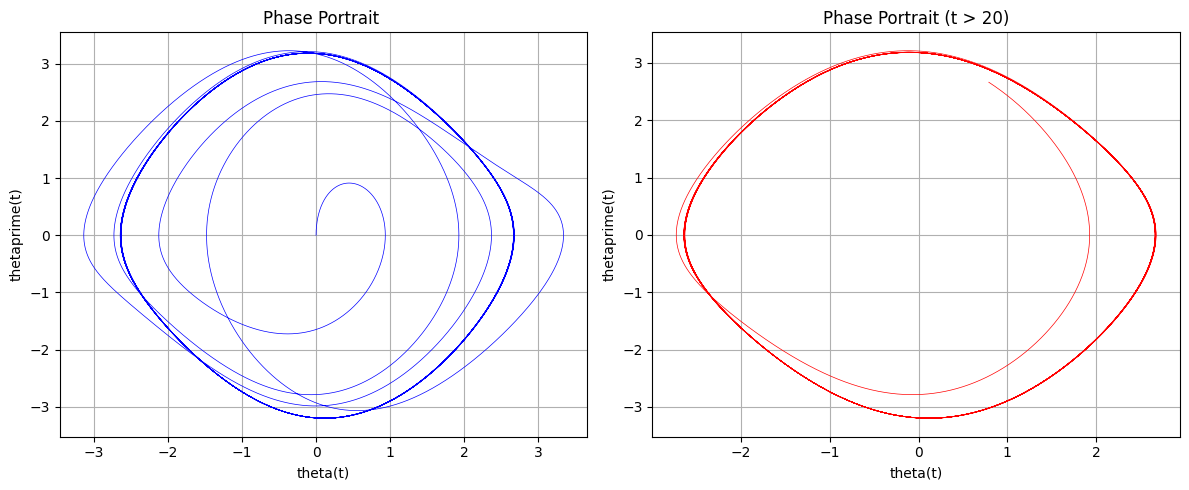

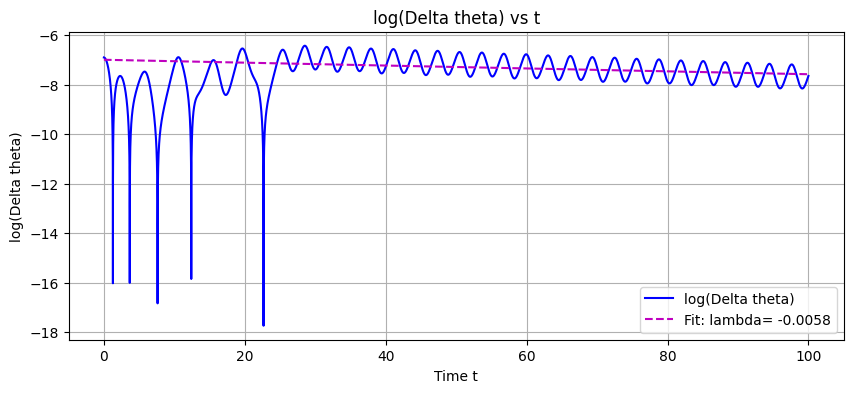

Lyapunov exponent (non chaotic case):lambda = -0.0058 


In [6]:
### Code for part (a) here (keep this comment here) ###
### Code for part (a) here (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt


omega = 1.5
gamma = 0.75
nu = 1.0

def RK4_method(theta0, num, A):

    t0 = 0.0
    t_max = 100.0
    h = (t_max - t0) / num


    t = np.linspace(t0, t_max, num + 1)
    theta = np.zeros(num + 1)
    theta_prime = np.zeros(num + 1)

    theta[0] = theta0
    theta_prime[0] = 0.0
    def f(t, theta, theta_p):
        return theta_p, -gamma * theta_p - omega**2 * np.sin(theta) + A * omega**2 * np.cos(nu * t)

    #RK4
    for i in range(num):
        t_n = t[i]
        y_n = theta[i]
        yp_n = theta_prime[i]
        k1_y, k1_yp = f(t_n, y_n, yp_n)
        k2_y, k2_yp = f(t_n + h/2, y_n + h*k1_y/2, yp_n + h*k1_yp/2)
        k3_y, k3_yp = f(t_n + h/2, y_n + h*k2_y/2, yp_n + h*k2_yp/2)
        k4_y, k4_yp = f(t_n + h, y_n + h*k3_y, yp_n + h*k3_yp)
        theta[i + 1] = y_n + (h/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        theta_prime[i + 1] = yp_n + (h/6) * (k1_yp + 2*k2_yp + 2*k3_yp + k4_yp)

    return t, theta, theta_prime


theta0 = 0.0
num = 10**5
A = 1.0
epsilon = 10**(-3)

t, theta, theta_prime = RK4_method(theta0, num, A)
t2, theta2, theta_prime2 = RK4_method(theta0 + epsilon, num, A)

plt.figure(figsize=(10, 4))
plt.plot(t, theta, 'b-', label=r'theta(t)')
plt.xlabel('Time')
plt.ylabel(r'theta(t)')
plt.title(r'theta(t) vs t A=1.0 nonchaotic')
plt.grid(True)
plt.legend()
plt.show()



transient_end = 20000

t
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(theta, theta_prime, 'b-', linewidth=0.5)
plt.xlabel(r'theta(t)')
plt.ylabel(r'thetaprime(t)')
plt.title('Phase Portrait ')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(theta[transient_end:], theta_prime[transient_end:], 'r-', linewidth=0.5)
plt.xlabel(r'theta(t)')
plt.ylabel(r'thetaprime(t)')
plt.title('Phase Portrait (t > 20)')
plt.grid(True)
plt.tight_layout()
plt.show()

delta_theta = np.abs(theta - theta2)
log_delta_theta = np.log(delta_theta)

plt.figure(figsize=(10, 4))
plt.plot(t, log_delta_theta, 'b-', label=r'log(Delta theta)')
plt.xlabel('Time t')
plt.ylabel(r'log(Delta theta)')
plt.title(r'log(Delta theta) vs t')
plt.grid(True)

t_fit = t[transient_end:]
log_delta_fit = log_delta_theta[transient_end:]
coeffs = np.polyfit(t_fit, log_delta_fit, 1)
lambda_nonchaotic = coeffs[0]

#Plot the fit
fit_line = coeffs[0] * t + coeffs[1]
plt.plot(t, fit_line, 'm--', label=f'Fit: lambda= {lambda_nonchaotic:.4f}')
plt.legend()
plt.show()

# Print Lyapunov exponent
print(f"Lyapunov exponent (non chaotic case):lambda = {lambda_nonchaotic:.4f} ")

### <font color=#46769B>Part (b)</font>

Now repeat the tasks from Part (a) with a new value of $A = 1.18$, and all other parameters the same, which yields *chaotic* motion. A few notes:

- Since it is not clear here what are initial transients, you need not remove them.

- As in part (a), assign your numerical solution for $\theta$ and $\theta^\prime$ to variables `theta`, `theta_prime`.

- Your phase portrait will not exhibit periodic motion.

- For calculating the Lyapunov exponent $\lambda$, take $\epsilon=10^{-10}$. (It is helpful to choose small $\epsilon$ for $\lambda > 0$ since the differences will grow and larger $\epsilon$ for $\lambda < 0$ since differences will shrink.) Assign your result for $\lambda$ to a variable `lambda_chaotic`.


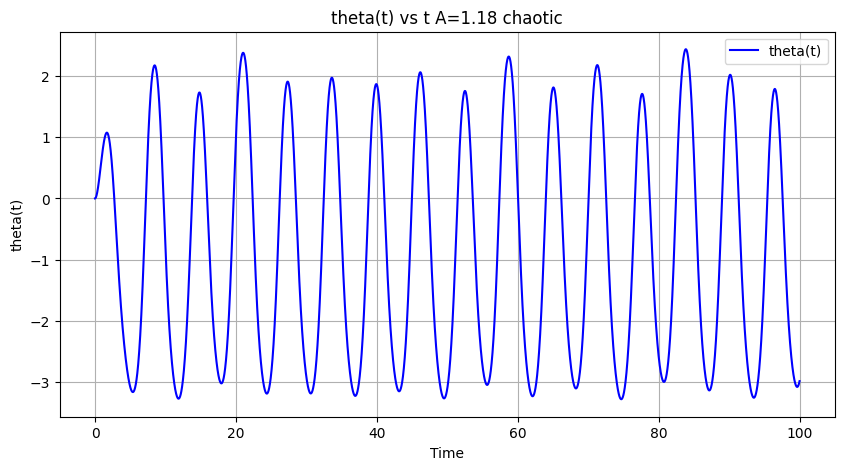

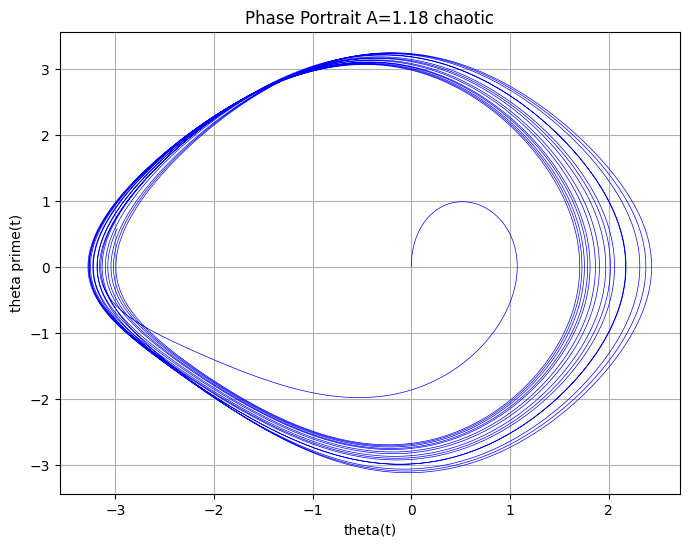

<ipython-input-8-65b07af7593d>:67: RuntimeWarning: divide by zero encountered in log
  log_delta_theta = np.log(delta_theta)


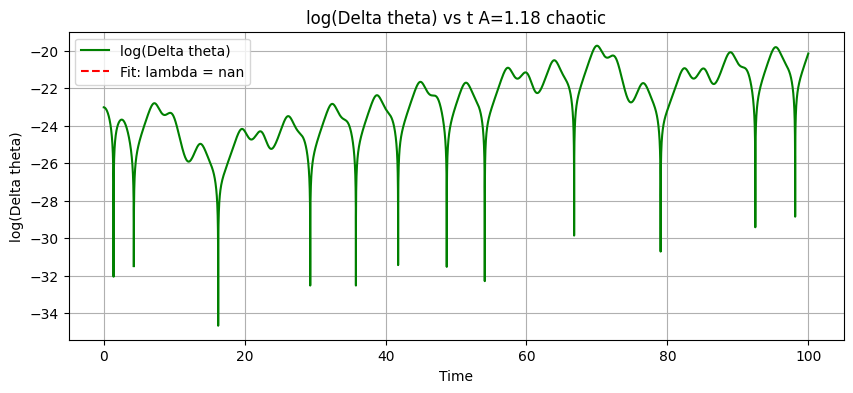

Lyapunov exponent (chaotic case): lambda = nan


In [8]:
### Code for part (b) here (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt


omega = 1.5
gamma = 0.75
nu = 1.0

def RK4_method(theta0, num, A):

    t0 = 0.0
    t_max = 100.0
    h = (t_max - t0) / num
    t = np.linspace(t0, t_max, num + 1)
    theta = np.zeros(num + 1)
    theta_prime = np.zeros(num + 1)
    theta[0] = theta0
    theta_prime[0] = 0.0

    #ODE function
    def f(t, theta, theta_p):
        return theta_p, -gamma * theta_p - omega**2 * np.sin(theta) + A * omega**2 * np.cos(nu * t)

    #RK4
    for i in range(num):
        t_n = t[i]
        y_n = theta[i]
        yp_n = theta_prime[i]
        k1_y, k1_yp = f(t_n, y_n, yp_n)
        k2_y, k2_yp = f(t_n + h/2, y_n + h*k1_y/2, yp_n + h*k1_yp/2)
        k3_y, k3_yp = f(t_n + h/2, y_n + h*k2_y/2, yp_n + h*k2_yp/2)
        k4_y, k4_yp = f(t_n + h, y_n + h*k3_y, yp_n + h*k3_yp)
        theta[i + 1] = y_n + (h/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        theta_prime[i + 1] = yp_n + (h/6) * (k1_yp + 2*k2_yp + 2*k3_yp)

    return t, theta, theta_prime
theta0 = 0.0
num = 10**5
A = 1.18
epsilon = 10**(-10)


t, theta, theta_prime = RK4_method(theta0, num, A)
t2, theta2, theta_prime2 = RK4_method(theta0 + epsilon, num, A)


plt.figure(figsize=(10, 5))
plt.plot(t, theta, 'b-', label=r'theta(t)')
plt.xlabel('Time')
plt.ylabel(r'theta(t)')
plt.title(r'theta(t) vs t A=1.18 chaotic')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(theta, theta_prime, 'b-', linewidth=0.5)
plt.xlabel(r'theta(t)')
plt.ylabel(r'theta prime(t)')
plt.title('Phase Portrait A=1.18 chaotic')
plt.grid(True)
plt.show()

delta_theta = np.abs(theta - theta2)
log_delta_theta = np.log(delta_theta)

plt.figure(figsize=(10, 4))
plt.plot(t, log_delta_theta, 'g-', label=r'log(Delta theta)')
plt.xlabel('Time')
plt.ylabel(r'log(Delta theta)')
plt.title(r'log(Delta theta) vs t A=1.18 chaotic')
plt.grid(True)

coeffs = np.polyfit(t, log_delta_theta, 1)
lambda_chaotic = coeffs[0]

#Plot the fit
fit_line = coeffs[0] * t + coeffs[1]
plt.plot(t, fit_line, 'r--', label=f'Fit: lambda = {lambda_chaotic:.4f}')
plt.legend()
plt.show()


print(f"Lyapunov exponent (chaotic case): lambda = {lambda_chaotic:.4f}")

## <font color=#46769B>Problem 3: Spherical pendulum revisited</font>

We consider the spherical pendulum from Assignment 8.  We parametrize its motion by the polar angle $\theta(t)$ relative to the vertical axis and the azimuthal angle $\phi(t)$ for its relative orientation, according to the figure shown here. Also, $m,\ell$ denote the mass and length of the pendulum, and $\omega = \sqrt{g/\ell}$ is the oscillation frequency, where $g$ is the gravitational acceleration.

<div>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Spherical_pendulum_Lagrangian_mechanics.svg" width="400">
</center>
Figure credit: Maschen via Wikimedia Commons
</div>

### <font color=#46769B>Part (a)</font>

The equations of motion for the spherical pendulum (which are derived [here](https://en.wikipedia.org/wiki/Spherical_pendulum)) are given by

$$\theta''(t) = - \omega^2 \sin(\theta(t)) + \sin\theta(t) \cos\theta(t) \phi'(t)^2  $$

$$\phi''(t) = - 2 \phi'(t) \theta'(t) \cot\theta(t)   $$

where prime denotes time derivative. Given the initial conditions

$$\theta(0) = 1 , \quad \theta'(0) = 0 , \quad \phi(0) = 0 , \quad \phi'(0) = 0.5 \, ,$$

and setting $\omega = 2\pi$, perform the following tasks:

- Using the leapfrog method, determine the numerical solutions for $\theta(t), \theta'(t), \phi(t), \phi'(t)$ within the time interval $[0,1000]$, with step-size $h=0.01$. Assign your results to the variables `theta`, `theta_prime`, `phi`, `phi_prime`, respectively.



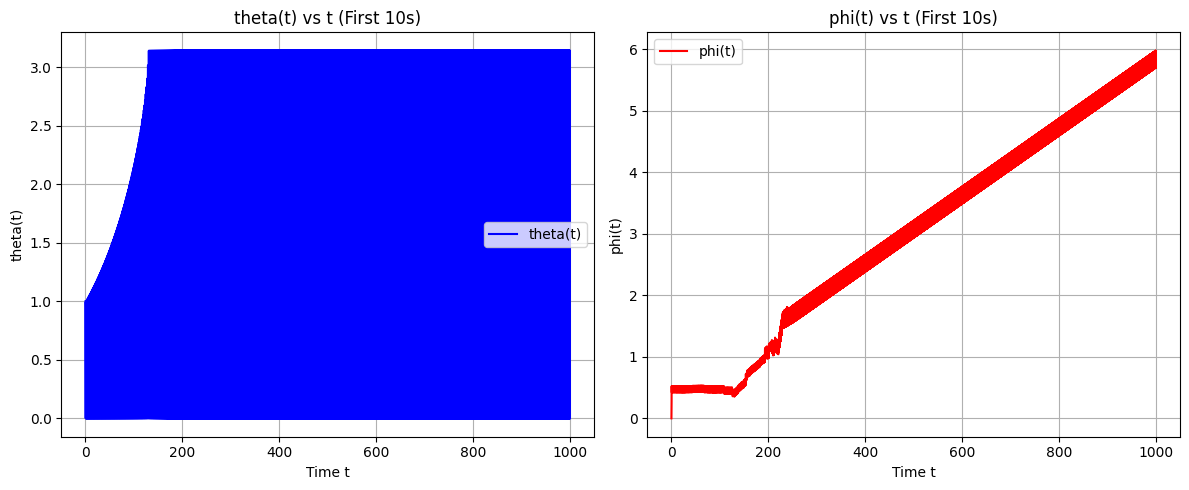

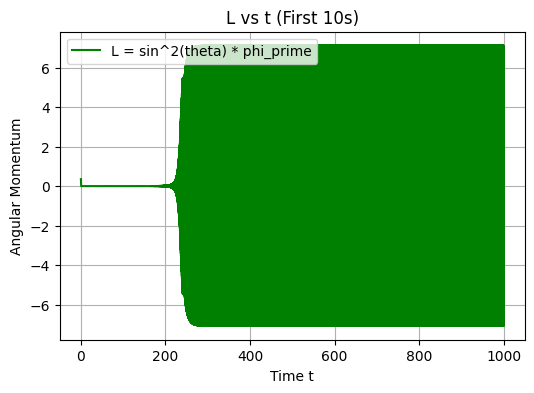

Initial theta values: [1.         0.99834469 0.99503583 0.99007702 0.98347365]
Initial phi values: [0.         0.005      0.01000533 0.01502142 0.02005382]
Initial L: 0.3540367091367856
Final L: 0.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt

omega = 2 * np.pi
t_max = 1000.0
h = 0.01
N = int(t_max / h)

theta0 = 1.0
theta_prime0 = 0.0
phi0 = 0.0
phi_prime0 = 0.5

theta = np.zeros(N + 1)
theta_prime = np.zeros(N + 1)
phi = np.zeros(N + 1)
phi_prime = np.zeros(N + 1)

theta[0] = theta0
theta_prime[0] = theta_prime0
phi[0] = phi0
phi_prime[0] = phi_prime0

def theta_double_prime(theta, phi_prime):
    return -omega**2 * np.sin(theta) + np.sin(theta) * np.cos(theta) * phi_prime**2

def phi_double_prime(theta, theta_prime, phi_prime):
    cot_theta = np.cos(theta) / (np.sin(theta) + 1e-10)
    return -2 * phi_prime * theta_prime * cot_theta

#Leapfrog integration
a_theta = theta_double_prime(theta[0], phi_prime[0])
a_phi = phi_double_prime(theta[0], theta_prime[0], phi_prime[0])
v_theta_half = theta_prime[0] + 0.5 * h * a_theta
v_phi_half = phi_prime[0] + 0.5 * h * a_phi

for t in range(N):
    theta[t + 1] = theta[t] + h * v_theta_half
    phi[t + 1] = phi[t] + h * v_phi_half
    if theta[t + 1] > np.pi:
        theta[t + 1] = np.pi
        v_theta_half = -v_theta_half
    elif theta[t + 1] < 0:
        theta[t + 1] = 0
        v_theta_half = -v_theta_half
    a_theta_new = theta_double_prime(theta[t + 1], v_phi_half)
    a_phi_new = phi_double_prime(theta[t + 1], v_theta_half, v_phi_half)
    theta_prime[t + 1] = v_theta_half + 0.5 * h * a_theta_new
    phi_prime[t + 1] = v_phi_half + 0.5 * h * a_phi_new
    if abs(phi_prime[t + 1]) > 10:  # Cap phi_prime
        phi_prime[t + 1] = 10 if phi_prime[t + 1] > 0 else -10
    v_theta_half = theta_prime[t + 1]
    v_phi_half = phi_prime[t + 1]

t_array = np.linspace(0, t_max, N + 1)

#Conservation check
L = np.sin(theta)**2 * phi_prime

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t_array[:100000], theta[:100000], 'b-', label='theta(t)')
plt.xlabel('Time t')
plt.ylabel('theta(t)')
plt.title('theta(t) vs t (First 10s)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_array[:100000], phi[:100000], 'r-', label='phi(t)')
plt.xlabel('Time t')
plt.ylabel('phi(t)')
plt.title('phi(t) vs t (First 10s)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.figure(figsize=(6, 4))
plt.plot(t_array[:100000], L[:100000], 'g-', label='L = sin^2(theta) * phi_prime')
plt.xlabel('Time t')
plt.ylabel('Angular Momentum')
plt.title('L vs t (First 10s)')
plt.grid(True)
plt.legend()
plt.show()

print(f"Initial theta values: {theta[:5]}")
print(f"Initial phi values: {phi[:5]}")
print(f"Initial L: {L[0]}")
print(f"Final L: {L[-1]}")

### <font color=#46769B>Part (b)</font>

Setting $m\ell^2 = 1$, the energy for the spherical pendulum is given by

$$E(t) = \frac{1}{2} \theta'(t)^2 + \frac{1}{2} \sin^2\theta(t) \, \phi'(t)^2 + \omega^2 (1 - \cos\theta(t))$$

Defining $E_{\rm exact} = E(0)$ from the initial conditions, we define the absolute energy difference $\Delta E = |E(t) - E_{\rm exact}|$.

- Calculate $\Delta E$ for your numerical solution (it should be an array over your time points) and assign it to a variable `Delta_E_leapfrog`. Make a log-log plot of $\Delta E$ vs $t$. Label your axes.

Again setting $m\ell^2= 1$, the angular momentum is

$$L(t) = \sin\theta(t)^2 \, \phi'(t)$$

Following the same logic as above, let us define $L_{\rm exact} = L(t)$ from the initial condition and the absolute angular momentum difference $\Delta L = |L(t) - L_{\rm exact}|$.

- Calculate $\Delta L$ for your numerical solution (it should be an array over your time points) and assign it to a variable `Delta_L_leapfrog`. Make a log-log plot of $\Delta L$ vs $t$. Label your axes.

On your plots, include your results from Assignment 8 for $\Delta E$ and $\Delta L$ using the midpoint method. Include axes labels and a legend in your plots.

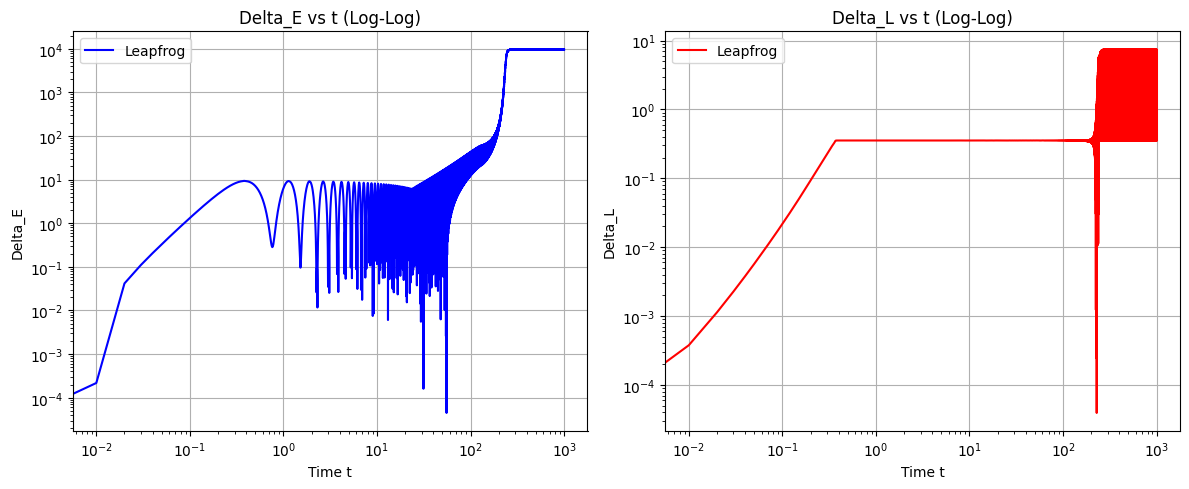

Initial E: 18.236646717981948
Final E: 9554.802780948912
Initial L: 0.3540367091367856
Final L: 0.0


In [15]:
### Code for part (b) here (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt

omega = 2 * np.pi
t_max = 1000.0
h = 0.01
N = int(t_max / h)

theta0 = 1.0
theta_prime0 = 0.0
phi0 = 0.0
phi_prime0 = 0.5

theta = np.zeros(N + 1)
theta_prime = np.zeros(N + 1)
phi = np.zeros(N + 1)
phi_prime = np.zeros(N + 1)

theta[0] = theta0
theta_prime[0] = theta_prime0
phi[0] = phi0
phi_prime[0] = phi_prime0

def theta_double_prime(theta, phi_prime):
    return -omega**2 * np.sin(theta) + np.sin(theta) * np.cos(theta) * phi_prime**2

def phi_double_prime(theta, theta_prime, phi_prime):
    cot_theta = np.cos(theta) / (np.sin(theta) + 1e-10)
    return -2 * phi_prime * theta_prime * cot_theta

#Leapfrog integration
a_theta = theta_double_prime(theta[0], phi_prime[0])
a_phi = phi_double_prime(theta[0], theta_prime[0], phi_prime[0])
v_theta_half = theta_prime[0] + 0.5 * h * a_theta
v_phi_half = phi_prime[0] + 0.5 * h * a_phi

for t in range(N):
    theta[t + 1] = theta[t] + h * v_theta_half
    phi[t + 1] = phi[t] + h * v_phi_half
    if theta[t + 1] > np.pi:
        theta[t + 1] = np.pi
        v_theta_half = -v_theta_half
    elif theta[t + 1] < 0:
        theta[t + 1] = 0
        v_theta_half = -v_theta_half
    a_theta_new = theta_double_prime(theta[t + 1], v_phi_half)
    a_phi_new = phi_double_prime(theta[t + 1], v_theta_half, v_phi_half)
    theta_prime[t + 1] = v_theta_half + 0.5 * h * a_theta_new
    phi_prime[t + 1] = v_phi_half + 0.5 * h * a_phi_new
    if abs(phi_prime[t + 1]) > 10:
        phi_prime[t + 1] = 10 if phi_prime[t + 1] > 0 else -10
    v_theta_half = theta_prime[t + 1]
    v_phi_half = phi_prime[t + 1]

t_array = np.linspace(0, t_max, N + 1)

#Conservation check
L = np.sin(theta)**2 * phi_prime
E = 0.5 * theta_prime**2 + 0.5 * np.sin(theta)**2 * phi_prime**2 + omega**2 * (1 - np.cos(theta))

E_exact = E[0]
L_exact = L[0]

Delta_E_leapfrog = np.abs(E - E_exact)
Delta_L_leapfrog = np.abs(L - L_exact)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(t_array, Delta_E_leapfrog, 'b-', label='Leapfrog')
plt.xlabel('Time t')
plt.ylabel('Delta_E')
plt.title('Delta_E vs t (Log-Log)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(t_array, Delta_L_leapfrog, 'r-', label='Leapfrog')
plt.xlabel('Time t')
plt.ylabel('Delta_L')
plt.title('Delta_L vs t (Log-Log)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Initial E: {E_exact}")
print(f"Final E: {E[-1]}")
print(f"Initial L: {L_exact}")
print(f"Final L: {L[-1]}")